# K-Means
dev:mehdi sahraei

[my github](https://github.com/mehdisahraeei/ml-project)

### importing_libraries

In [2]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

### Reading the data with pandas

In [21]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### data

In [23]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,0:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

### Training Model

In [25]:
clusterNum = 3 #num of cluster
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### assigning the labels to each row in dataframe

In [33]:
df["outcome"] = labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),outcome
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


### groupby: groupby() function is used to split the data into groups based on some criteria

In [34]:
df.groupby('outcome').mean()

,Age,Annual Income (k$),Spending Score (1-100)
outcome,,,
0,40.394737,87.000000,18.631579
1,40.325203,44.154472,49.829268
2,32.692308,86.538462,82.128205


In [40]:
userInput1 = [
               {'outcome':2},
             ] 

inputMovies1 = pd.DataFrame(userInput1)
inputMovies1

,outcome
0,2


In [41]:
inputId1 = df[df['outcome'].isin(inputMovies1['outcome'].tolist())]
inputId1

,Age,Annual Income (k$),Spending Score (1-100),outcome
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2


### Elbow Method

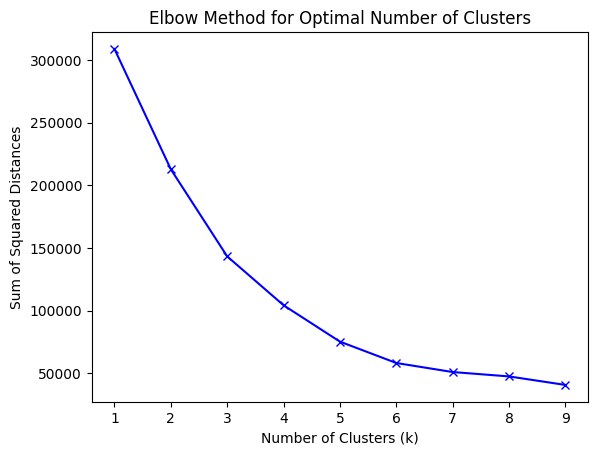

In [47]:
from sklearn import datasets


# List of possible values for the number of clusters (k)
k_values = range(1, 10)

# List to store the sum of squared distances for each cluster
variances = []

# Run K-means algorithm for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    variances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, variances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

### scatter

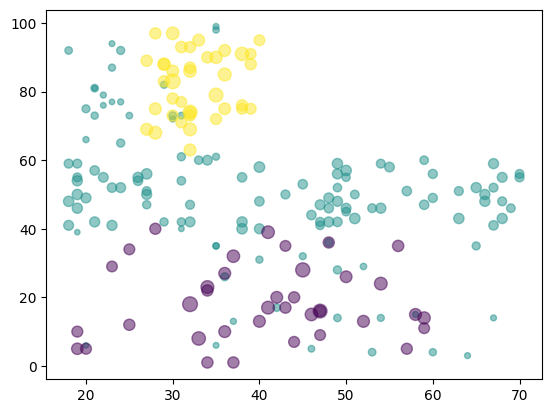

In [66]:
area = np.pi + ( X[:, 1])*0.8
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(float), alpha=0.5)
plt.show()

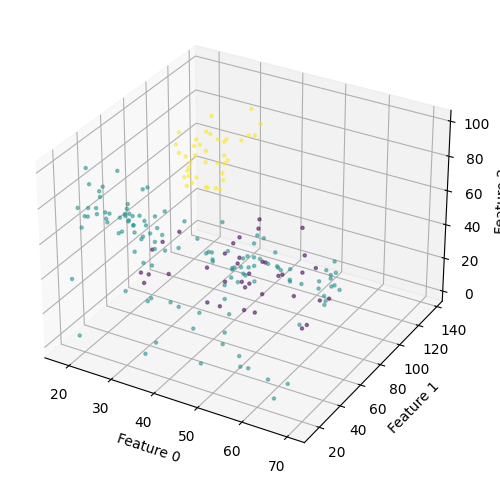

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), s=5, alpha=0.5) #s: size obj

# Set labels for each axis
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')

plt.show()
